<a href="https://colab.research.google.com/github/snehapandey2000/Intrusion-Detection-System/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/DRDO Internship/Code/Datasets/processed.csv")

In [ ]:
df.head()

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_std,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,...,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean,label,label_code,label_is_attack,label_is_attack_dos_attacks_hulk,label_is_attack_bot,label_is_attack_dos_attacks_slowhttptest
0,0,112640768,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
1,0,112641773,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
2,6,20784143,23,44,2416,240,54.542294,30.545454,32.3365,180.907146,...,255,20,2624734.0,9058214.0,Benign,0,0,0,0,0
3,0,112640836,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,-1,0,0.0,56300000.0,Benign,0,0,0,0,0
4,6,20,1,1,0,0,0.000000,0.000000,0.0000,0.000000,...,0,20,0.0,0.0,Benign,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094591 entries, 0 to 2094590
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   protocol                                  int64  
 1   flow_duration                             int64  
 2   tot_fwd_pkts                              int64  
 3   tot_bwd_pkts                              int64  
 4   totlen_fwd_pkts                           int64  
 5   fwd_pkt_len_max                           int64  
 6   fwd_pkt_len_std                           float64
 7   bwd_pkt_len_mean                          float64
 8   bwd_pkt_len_std                           float64
 9   flow_byts_s                               float64
 10  flow_pkts_s                               float64
 11  flow_iat_std                              float64
 12  flow_iat_min                              int64  
 13  fwd_iat_tot                               int64  
 14  fw

Replacing infinity value with mean vale of column



In [ ]:
import numpy as np
inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [ ]:
X = df.drop(columns=['label', 'label_code', 'label_is_attack', 'label_is_attack_dos_attacks_hulk','label_is_attack_bot','label_is_attack_dos_attacks_slowhttptest'])
y = df[['label_is_attack']]

In [ ]:
X.head()

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_std,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,...,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,down_up_ratio,init_fwd_win_byts,init_bwd_win_byts,fwd_seg_size_min,active_mean,idle_mean
0,0,112640768,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,0,0,0,0,0,-1,-1,0,0.0,56300000.0
1,0,112641773,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,0,0,0,0,0,-1,-1,0,0.0,56300000.0
2,6,20784143,23,44,2416,240,54.542294,30.545454,32.3365,180.907146,...,0,0,1,0,1,263,255,20,2624734.0,9058214.0
3,0,112640836,3,0,0,0,0.000000,0.000000,0.0000,0.000000,...,0,0,0,0,0,-1,-1,0,0.0,56300000.0
4,6,20,1,1,0,0,0.000000,0.000000,0.0000,0.000000,...,0,1,0,0,1,58856,0,20,0.0,0.0


In [ ]:
y.head()

,label_is_attack
0,0
1,0
2,0
3,0
4,0


Splitting training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, stratify=y.label_is_attack)
X_eval, X_test, y_eval, y_test = train_test_split(X_hold, y_hold, test_size=0.5, stratify=y_hold.label_is_attack)

X_train_oh = pd.get_dummies(X_train, columns=['protocol'])
X_eval_oh = pd.get_dummies(X_eval, columns=['protocol'])
X_test_oh = pd.get_dummies(X_test, columns=['protocol'])

In [ ]:
y_train.label_is_attack.value_counts()

0    965278
1    710394
Name: label_is_attack, dtype: int64

In [ ]:
y_eval.label_is_attack.value_counts()

0    120660
1     88799
Name: label_is_attack, dtype: int64

In [ ]:
y_test.label_is_attack.value_counts()

0    120660
1     88800
Name: label_is_attack, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_oh)

StandardScaler()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Classification report

In [ ]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
def print_report(ds_type, cls, X_vals, y_true, y_predict, plot_pr=False, plot_roc=False):
    print(f"Classification Report ({ds_type}):")
    print(classification_report(y_true, y_predict))
    print(f"Avg Precision Score: {average_precision_score(y_true, y_predict, average='weighted')}")
    
    if plot_roc:
        print(f"ROC AUC Score: {roc_auc_score(y_true, y_predict)}")
        skplt.metrics.plot_roc(y_true, cls.predict_proba(X_vals))
        plt.show()
        
    if plot_pr:
        
        skplt.metrics.plot_precision_recall(y_true, cls.predict_proba(X_vals))
        plt.show()
        
    print('\n')

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
cls_lr = LogisticRegression(solver='saga', n_jobs=-1, verbose=2)
cls_lr.fit(scaler.transform(X_train_oh), y_train.label_is_attack)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 147 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


LogisticRegression(n_jobs=-1, solver='saga', verbose=2)

ROC is a plot of signal (True Positive Rate) against noise (False Positive Rate). The model performance is determined by looking at the area under the ROC curve (or AUC). The best possible AUC is 1 while the worst is 0.5 (the 45 degrees random line). Any value less than 0.5 means we can simply do the exact opposite of what the model recommends to get the value back above 0.5.


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    965278
           1       0.92      1.00      0.95    710394

    accuracy                           0.96   1675672
   macro avg       0.96      0.96      0.96   1675672
weighted avg       0.96      0.96      0.96   1675672

Avg Precision Score: 0.9139912317038166


Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    120660
           1       0.91      1.00      0.95     88799

    accuracy                           0.96    209459
   macro avg       0.96      0.96      0.96    209459
weighted avg       0.96      0.96      0.96    209459

Avg Precision Score: 0.9116003553811943


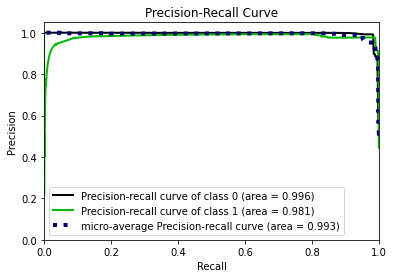

In [ ]:
print_report('Train', cls_lr, scaler.transform(X_train_oh), y_train.label_is_attack, cls_lr.predict(scaler.transform(X_train_oh)))
print_report('Eval', cls_lr, scaler.transform(X_eval_oh), y_eval.label_is_attack, cls_lr.predict(scaler.transform(X_eval_oh)), plot_pr=True)

In [ ]:
predictions= cls_lr.predict(scaler.transform(X_eval_oh))

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

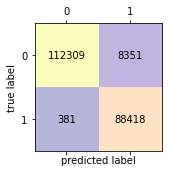

In [ ]:
conf_mat = confusion_matrix(y_eval, predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.plasma, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [ ]:
from eli5.sklearn import PermutationImportance
perm_lr = PermutationImportance(cls_lr, scoring='recall_weighted', n_iter=3).fit(X_eval_oh, y_eval.label_is_attack)

In [ ]:
eli5.show_weights(perm_lr, feature_names=X_eval_oh.columns.tolist())

Weight,Feature
0.0013 ± 0.0000,flow_duration
0 ± 0.0000,totlen_fwd_pkts
0 ± 0.0000,fwd_pkt_len_max
0 ± 0.0000,fwd_pkt_len_std
0 ± 0.0000,bwd_pkt_len_mean
0 ± 0.0000,bwd_pkt_len_std
0 ± 0.0000,flow_byts_s
0 ± 0.0000,flow_iat_std
0 ± 0.0000,flow_iat_min
0 ± 0.0000,active_mean


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cls_forest = RandomForestClassifier(verbose=1, n_jobs=-1, class_weight='balanced')
cls_forest.fit(X_train_oh, y_train.label_is_attack)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, verbose=1)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.5s finished


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    965278
           1       1.00      1.00      1.00    710394

    accuracy                           1.00   1675672
   macro avg       1.00      1.00      1.00   1675672
weighted avg       1.00      1.00      1.00   1675672

Avg Precision Score: 0.9998216395806683




[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


Classification Report (Eval):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120660
           1       1.00      1.00      1.00     88799

    accuracy                           1.00    209459
   macro avg       1.00      1.00      1.00    209459
weighted avg       1.00      1.00      1.00    209459

Avg Precision Score: 0.9996346032684155


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


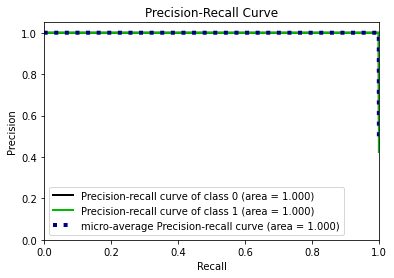

In [ ]:
print_report('Train', cls_forest, X_train_oh, y_train.label_is_attack, cls_forest.predict(X_train_oh))
print_report('Eval', cls_forest, X_eval_oh, y_eval.label_is_attack, cls_forest.predict(X_eval_oh), plot_pr=True)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


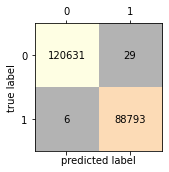

In [ ]:
predictions_rf= cls_forest.predict(X_eval_oh)
conf_mat_rf = confusion_matrix(y_eval, predictions_rf)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat_rf, cmap=plt.cm.inferno, alpha=0.3)
for i in range(conf_mat_rf.shape[0]):
    for j in range(conf_mat_rf.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_rf[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

Calculating Misclassifications

In [ ]:
def calculate_misclassifiations(y, predictions):
    classifications = y.copy()
    classifications['pred'] = predictions
    counts = classifications.label_is_attack.value_counts()
    
    misclassifications = classifications[classifications.label_is_attack != classifications.pred]
    mc = pd.DataFrame(misclassifications.label_is_attack.value_counts())
    mc['percentage'] = mc.apply(lambda x: x[0] / counts[x.name], axis=1)
    mc = mc.sort_values('percentage', ascending=False)
    
    print('Misclassifications:')
    display(mc)

In [ ]:
calculate_misclassifiations(y_eval, predictions_rf)

Misclassifications:


,label_is_attack,percentage
0,29,0.000240
1,6,0.000068


**Feature importance**

In order to analyse the problem the feature importances of the model are calculated. The most important features will be used to compare data from the two datasets.

In [ ]:
! pip install eli5
import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 17.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4f77f3c69c5ae686dd10fba304158ba3b559e83f6b2f59e07292a0cd477f1ce9
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(cls_forest, scoring='recall_weighted', n_iter=3).fit(X_eval_oh, y_eval.label_is_attack)
eli5.show_weights(perm, feature_names=X_eval_oh.columns.tolist())

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_job

Weight,Feature
0.2502 ± 0.0005,init_fwd_win_byts
0.1710 ± 0.0005,fwd_seg_size_min
0.0297 ± 0.0008,flow_duration
0.0257 ± 0.0002,fwd_iat_min
0.0007 ± 0.0000,init_bwd_win_byts
0.0006 ± 0.0001,flow_pkts_s
0.0002 ± 0.0000,bwd_pkt_len_std
0.0000 ± 0.0000,rst_flag_cnt
0.0000 ± 0.0000,flow_iat_min
0.0000 ± 0.0000,fwd_iat_tot


In [ ]:
feature_importance=eli5.show_weights(perm, feature_names=X_eval_oh.columns.tolist())

In [ ]:
feature_importance

Weight,Feature
0.2502 ± 0.0005,init_fwd_win_byts
0.1710 ± 0.0005,fwd_seg_size_min
0.0297 ± 0.0008,flow_duration
0.0257 ± 0.0002,fwd_iat_min
0.0007 ± 0.0000,init_bwd_win_byts
0.0006 ± 0.0001,flow_pkts_s
0.0002 ± 0.0000,bwd_pkt_len_std
0.0000 ± 0.0000,rst_flag_cnt
0.0000 ± 0.0000,flow_iat_min
0.0000 ± 0.0000,fwd_iat_tot


**NAIVE  BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls_nb = GaussianNB()
cls_nb.fit(X_train_oh, y_train.label_is_attack)

GaussianNB()

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.40      0.57    965278
           1       0.55      1.00      0.71    710394

    accuracy                           0.65   1675672
   macro avg       0.77      0.70      0.64   1675672
weighted avg       0.81      0.65      0.63   1675672

Avg Precision Score: 0.5481103764481984


Classification Report (Eval):
              precision    recall  f1-score   support

           0       0.99      0.40      0.57    120660
           1       0.55      1.00      0.71     88799

    accuracy                           0.65    209459
   macro avg       0.77      0.70      0.64    209459
weighted avg       0.81      0.65      0.63    209459

Avg Precision Score: 0.5486881737344397


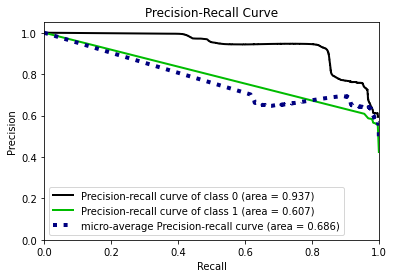

In [ ]:
print_report('Train', cls_nb, X_train_oh, y_train.label_is_attack, cls_nb.predict(X_train_oh))
print_report('Eval', cls_nb, X_eval_oh, y_eval.label_is_attack, cls_nb.predict(X_eval_oh), plot_pr=True)

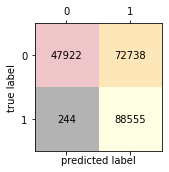

In [ ]:
predictions_nb= cls_nb.predict(X_eval_oh)
conf_mat_nb = confusion_matrix(y_eval, predictions_nb)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat_nb, cmap=plt.cm.inferno, alpha=0.3)
for i in range(conf_mat_nb.shape[0]):
    for j in range(conf_mat_nb.shape[1]):
        ax.text(x=j, y=i, s=conf_mat_nb[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()